# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [3]:
# Import the libraries you'll need here.
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 

%matplotlib inline 

import scipy.stats as stats 


# Load the cars csv file into a pandas dataframe.


In [4]:
# Load the csv file into a pandas dataframe.
df = pd.read_csv('data/cars.csv') 
df.head() 



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [5]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())
df.duplicated()


720


0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool

In [6]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates() 



In [7]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(df.duplicated().sum())


0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [8]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum() 

#the Engine HP column has the most, with 69 duplicates 



Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [9]:
# * Print how long (aka how many rows) our dataframe is.
print(df.shape)

(11194, 15)


In [10]:
# * Remove any row that has a null value in it. 
df = df.dropna()



In [11]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(df.shape)



(11092, 15)


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

<AxesSubplot:>

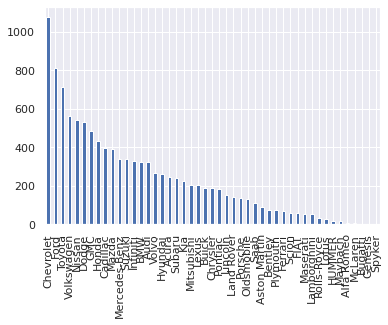

In [12]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
gb = df['Make'].value_counts()
gb.plot(kind='bar')
#gb.head()

# Make the chart more legible, by making it a horizontal bar chart and changing the figure size.

<AxesSubplot:>

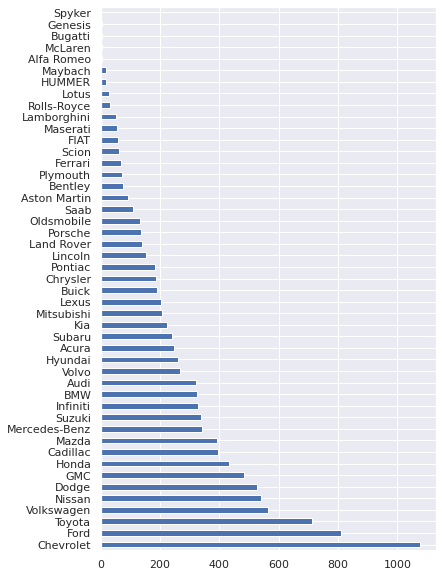

In [13]:
# Make the chart more legible, by making it a horizontal bar chart and changing the figure size.
gb.plot(kind='barh', figsize = (6,10))



### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


<AxesSubplot:xlabel='Year'>

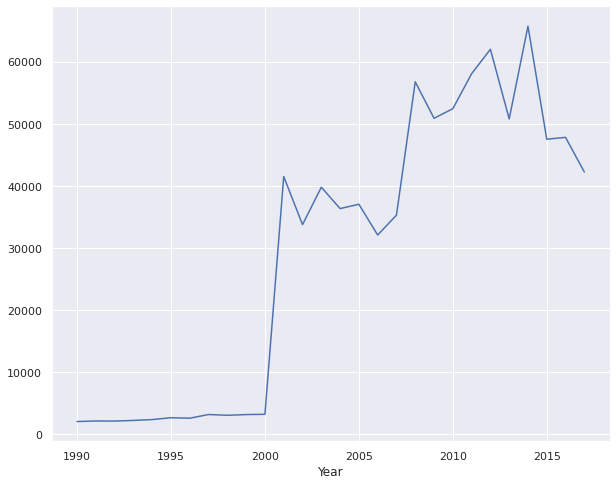

In [14]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

gb = df.groupby('Year')['MSRP'].mean()
gb.plot(kind='line', x='Year', y='MSRP',figsize=(10,8))

# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.  
_Hint use `np.where()`_.

In [15]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.
#numpy.where(condition, x, y) - if true, yield x, else yield y 

condition = df['Year'] < 2000 
df['adjusted_price'] = np.where(condition, df['MSRP']*10, df['MSRP'])

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<AxesSubplot:xlabel='Year'>

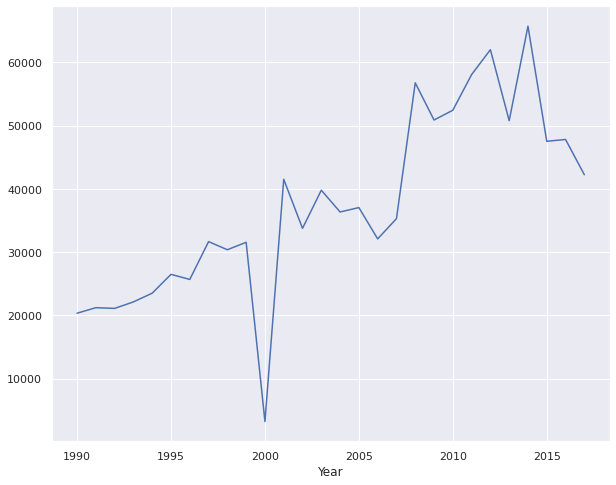

In [16]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000

gb = df.groupby('Year')['adjusted_price'].mean() 
gb.plot(kind='line', x='Year', y='adjusted_price', figsize=(10,8))



# What car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. _Hint, you can use df.head(5) for this_.
* Use our `adjusted_price` column for this

In [17]:
# What top 5 car makers make the most expensive cars on average. 

df.groupby('Make')['adjusted_price'].mean().sort_values(ascending = True).head(5)



Make
Suzuki        19733.734513
Scion         19932.500000
Plymouth      21153.633803
FIAT          22206.016949
Oldsmobile    22871.363636
Name: adjusted_price, dtype: float64

# What are the top 5 car makers that have the highest median highway MPG?

In [18]:
# Which car makers have the highest median highway MPG?
df.groupby('Make')['highway MPG'].median().sort_values(ascending = True).head(5)



Make
Bugatti    14
Ferrari    16
Maybach    16
HUMMER     18
Spyker     18
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

Text(0.5, 1.0, 'Relationship of Make and Adjusted Price')

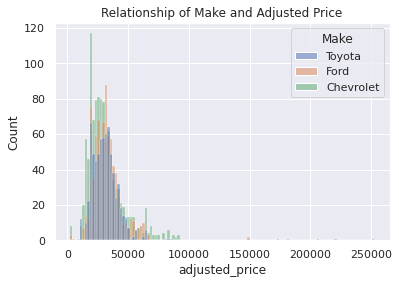

In [19]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

makes = ['Chevrolet', 'Ford', 'Toyota']

df2 = df[df['Make'].isin(makes)] #filtering the dataframe to only include cars with those makes 


ax = sns.histplot(data=df2, x='adjusted_price', hue='Make')
ax.set_title("Relationship of Make and Adjusted Price")

# Remake the same histogram, but limit the x-axis from 0 to 100,000

(0.0, 100000.0)

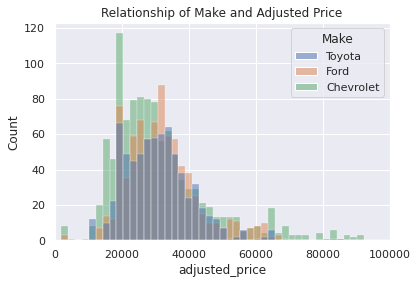

In [20]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

ax = sns.histplot(data=df2, x='adjusted_price', hue='Make')
ax.set_title("Relationship of Make and Adjusted Price")
ax.set_xlim(left = 0, right = 100000)


# Plot the relationship between Engine HP and highway MPG

Text(0.5, 1.0, 'Relationship between Engine HP and highway MPG')

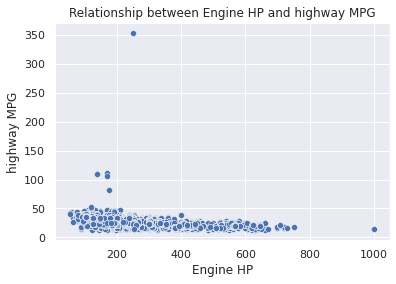

In [21]:
# Plot the relationship between Engine HP and highway MPG

ax = sns.scatterplot(data = df, x = 'Engine HP', y = 'highway MPG') 
ax.set_title("Relationship between Engine HP and highway MPG")


# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

In [22]:
#creating a new column for Z scores 
numerical_cols = ['Engine HP', 'highway MPG']

for col in numerical_cols: 
    # changing the name of the column 
    new_col_name = col + '_zscore'
    # Call the zscore function on the cols in the list from our dataframe
    df[new_col_name] = stats.stats.zscore(df[col])
    # Convert all values into absolute values. 
    df[new_col_name] = abs(df[new_col_name])


df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price,Engine HP_zscore,highway MPG_zscore
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135,0.739442,0.036479
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650,0.421779,0.230863
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350,0.421779,0.230863
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450,0.213547,0.230863
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500,0.213547,0.230863


In [23]:
condition = df['Engine HP_zscore'] < 3 
condition1 = df['highway MPG_zscore'] < 3


new_df = df.copy()
new_df = df[condition & condition1]

new_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price,Engine HP_zscore,highway MPG_zscore
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135,0.739442,0.036479
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650,0.421779,0.230863
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350,0.421779,0.230863
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450,0.213547,0.230863
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500,0.213547,0.230863


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


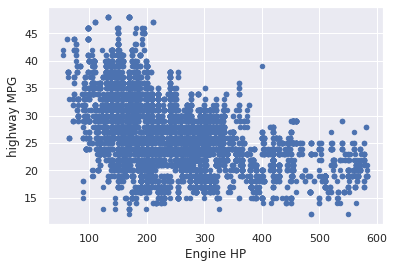

In [24]:
# Remove any statisical outliers from Engine HP and highway MPG

ax = new_df.plot(kind='scatter', x = 'Engine HP', y = 'highway MPG')

# What does this plot tell you about how Engine HP affects highway MPG?

In [25]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('The higher the Engine HP, the lower the highway MPG')

The higher the Engine HP, the lower the highway MPG


# Using a pairplot, display all of the linear relationships.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

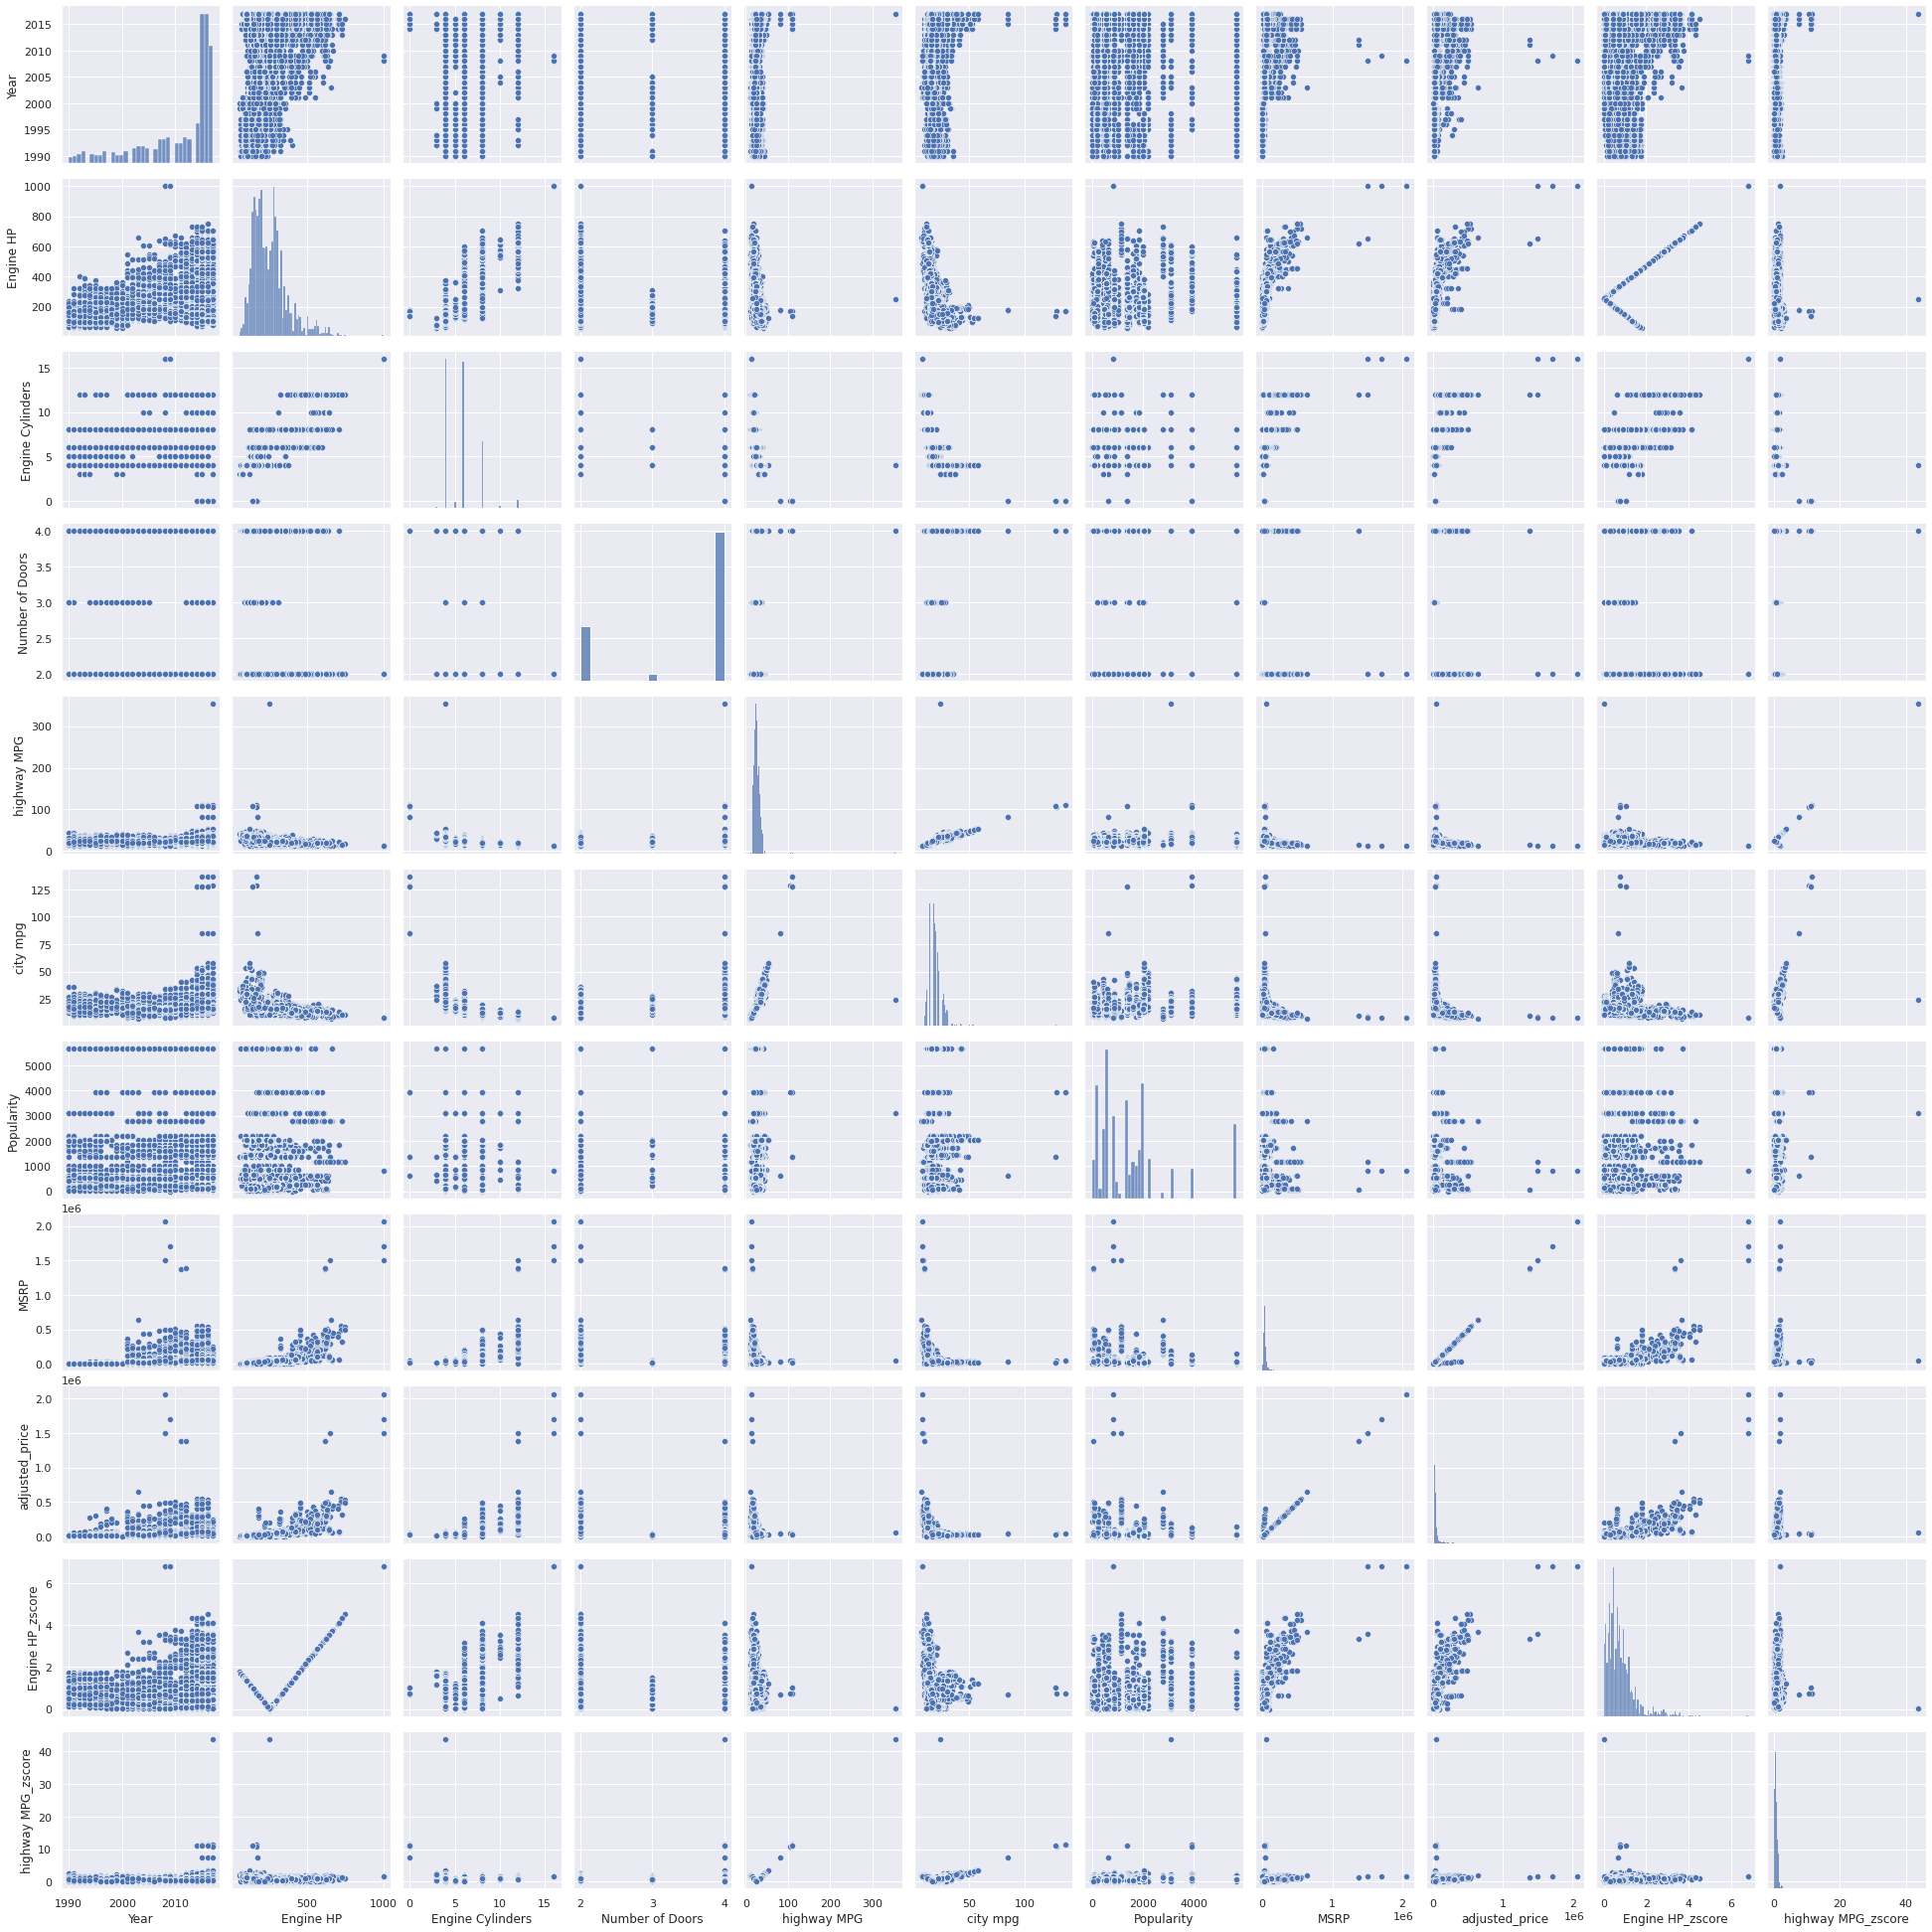

In [26]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)



In [27]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('highway MPG & city mpg')



highway MPG & city mpg


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

<AxesSubplot:>

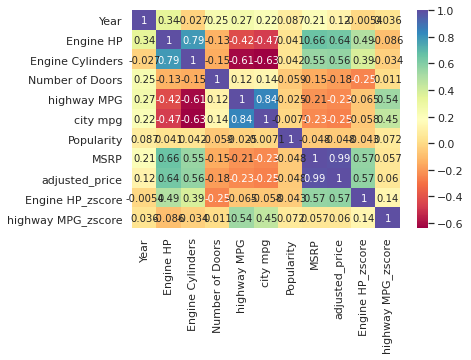

In [30]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
sns.heatmap(df.corr(), annot = True, cmap = 'Spectral')
#Engine HP has the strongest correlation with Engine Cylinders 

# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [30]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well




# Extra Credit part 2
Rebuild the charts you made but using the interactive plotting library, Plotly:  https://plotly.com/python/.  
* You may need to install plotly by running `pip install plotly` in your terminal. 